### EDA

In [2]:
# import libraries

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Univariate Feature Analysis

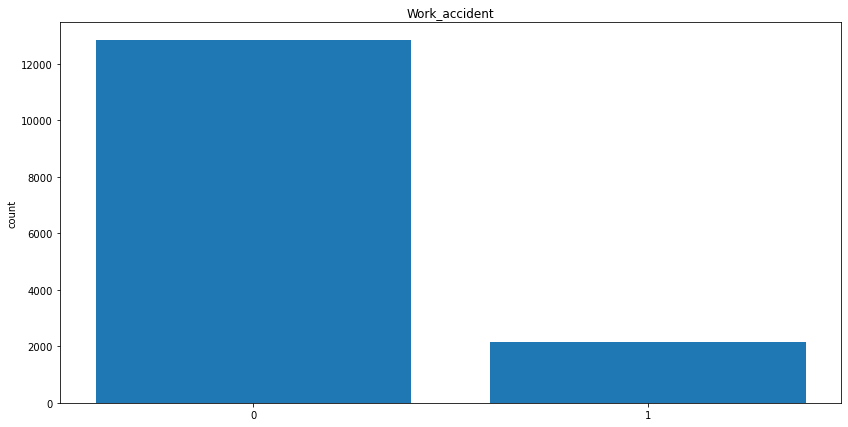

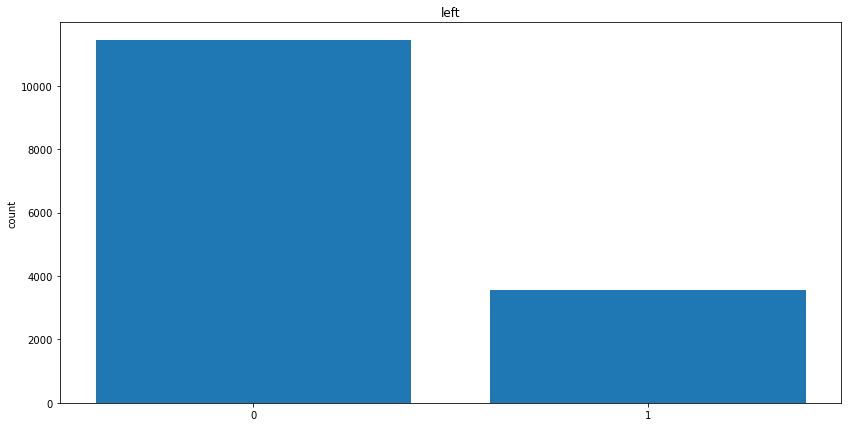

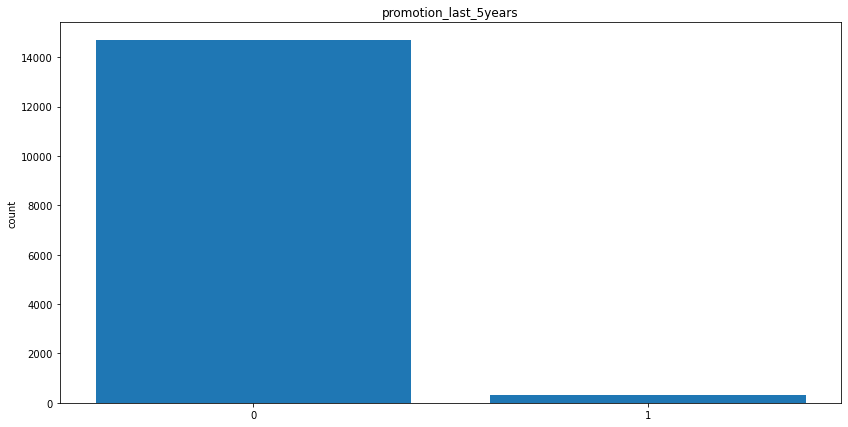

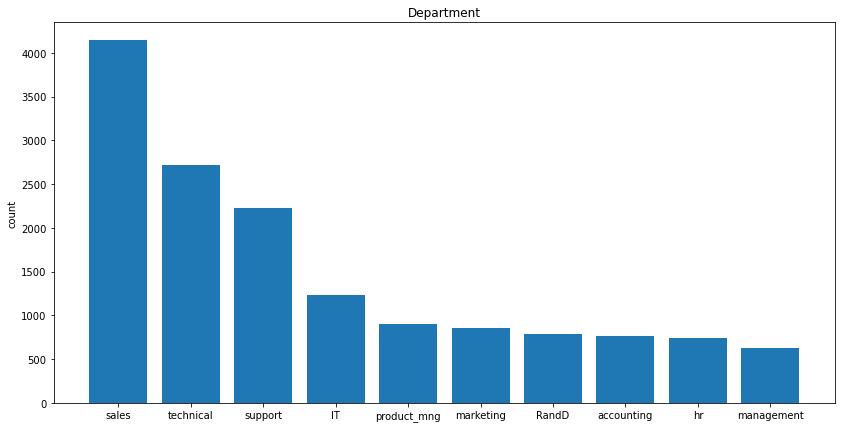

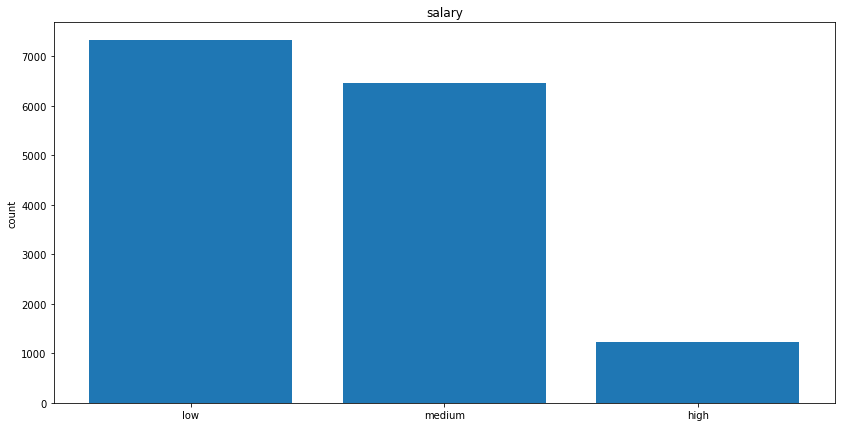

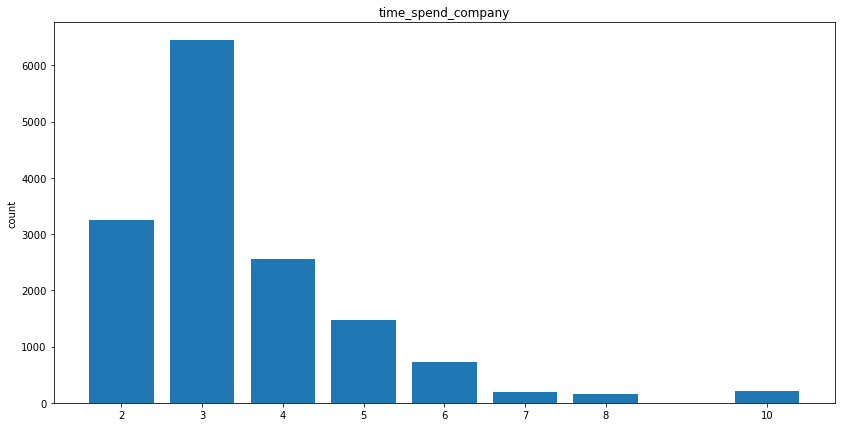

In [6]:
category = ['Work_accident','left','promotion_last_5years','Department','salary','time_spend_company']

def bar_plot(variable):
    val_counts = df[variable].value_counts()
    
    plt.figure(figsize=(14,7))
    plt.bar(val_counts.index,val_counts)
    
    plt.xticks(val_counts.index,val_counts.index.values)
    plt.ylabel('count')
    
    plt.title(variable)
    plt.show()
    
for c in category:
    bar_plot(c)

In [7]:
df[['left','time_spend_company']].groupby(['left'], as_index=False).mean()

,left,time_spend_company
0,0,3.380032
1,1,3.876505


In [8]:


df[['left','Department']].groupby(['Department'], as_index=False).mean().sort_values(by='left', ascending=False)

,Department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444



### ->More number of employees are left from hr department.


In [9]:
df[['promotion_last_5years','Department']].groupby(['Department'], as_index=False).mean().sort_values(by='promotion_last_5years',ascending=False)

,Department,promotion_last_5years
4,management,0.109524
5,marketing,0.050117
1,RandD,0.034307
7,sales,0.024155
3,hr,0.020298
2,accounting,0.018253
9,technical,0.010294
8,support,0.008973
0,IT,0.002445
6,product_mng,0.000000



### ->Promotion is done more in the Management department


In [10]:
numerical = ['average_montly_hours','satisfaction_level']

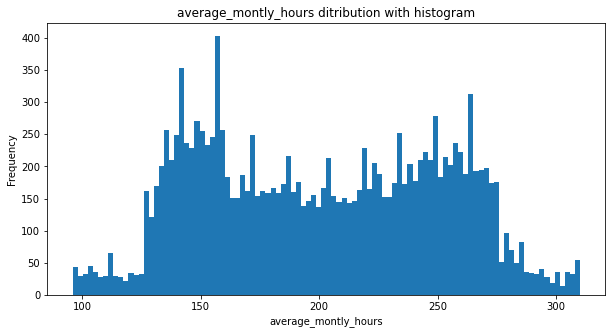

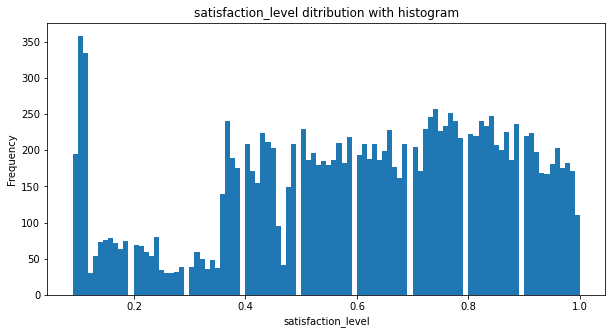

In [11]:
def plot_hist(numerical_var):
    plt.figure(figsize=(10,5))
    plt.hist(df[numerical_var],bins=100)
    plt.xlabel(numerical_var)
    plt.ylabel('Frequency')
    plt.title('{} ditribution with histogram'.format(numerical_var))
    
for n in numerical:
    plot_hist(n)

### Basic data Analysis

In [12]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [13]:
retained = df[df['left']==0]
retained.shape

(11428, 10)

In [14]:
df.groupby('left', as_index= False).mean()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### <span style='color:green'>-> Employees tend to leave when satisfaction_level is low</span>
###  <span style='color:green'>-> Employees tend to leave when average_montly_hours is high</span>
###  <span style='color:green'>-> Employee tend to leave when promotion oppportunity is low</span>

## Impact of salary

<AxesSubplot:xlabel='salary'>

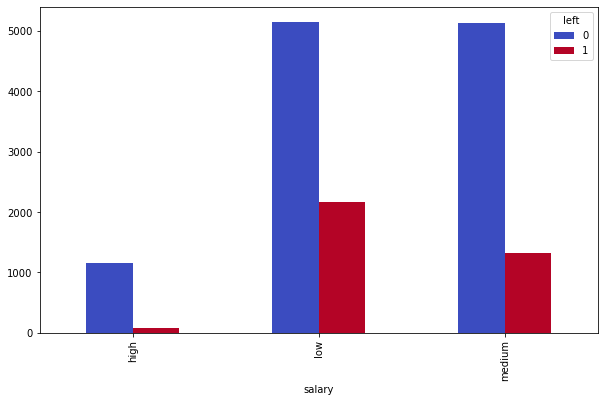

In [15]:
pd.crosstab(df.salary,df.left).plot(kind='bar', figsize=(10,6), colormap='coolwarm')

### <span style='color:green'>-> Salary impacts employee retention rate</span>

## Correlation between Department and employee retention

<AxesSubplot:xlabel='Department'>

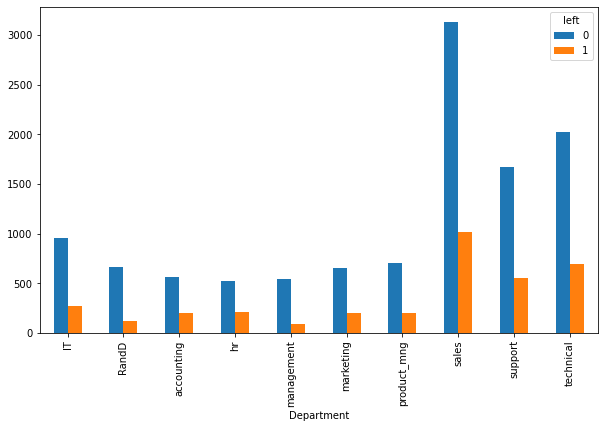

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar', figsize=(10,6))

### -> There is a little impact of Department in employee retention rate

### Logistic regression

In [17]:
lr = LogisticRegression()

X = df[['salary','satisfaction_level','average_montly_hours','promotion_last_5years','time_spend_company','last_evaluation','number_project','Work_accident']]

y = df.left

In [18]:
X

,salary,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,last_evaluation,number_project,Work_accident
0,low,0.38,157,0,3,0.53,2,0
1,medium,0.80,262,0,6,0.86,5,0
2,medium,0.11,272,0,4,0.88,7,0
3,low,0.72,223,0,5,0.87,5,0
4,low,0.37,159,0,3,0.52,2,0
...,...,...,...,...,...,...,...,...
14994,low,0.40,151,0,3,0.57,2,0
14995,low,0.37,160,0,3,0.48,2,0
14996,low,0.37,143,0,3,0.53,2,0
14997,low,0.11,280,0,4,0.96,6,0


In [19]:
dummies = pd.get_dummies(df[['salary']], drop_first=True)

In [20]:
dummies

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [21]:
X = pd.concat([X.drop(columns=['salary']),dummies], axis='columns')
X

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,last_evaluation,number_project,Work_accident,salary_low,salary_medium
0,0.38,157,0,3,0.53,2,0,1,0
1,0.80,262,0,6,0.86,5,0,0,1
2,0.11,272,0,4,0.88,7,0,0,1
3,0.72,223,0,5,0.87,5,0,1,0
4,0.37,159,0,3,0.52,2,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,0,3,0.57,2,0,1,0
14995,0.37,160,0,3,0.48,2,0,1,0
14996,0.37,143,0,3,0.53,2,0,1,0
14997,0.11,280,0,4,0.96,6,0,1,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [28]:
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
lr.score(X_test,y_test)

0.7806666666666666